In [73]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error


In [74]:
df = pd.read_csv("donation_data.csv")
df.head()

,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11
0,0,500,600,0,0.00,0,0,300,1350.0,1000,1390
1,2000,500,750,800,0.00,0,0,0,5680.0,8755,9465
2,6946,0,2000,13610,15750.00,22200,29791,88200,71418.0,49454,71311
3,32082,50395,110450,62750,6483.00,0,200,0,3200.0,0,4000
4,0,6750,5000,6000,27153.27,20700,35356,16000,18850.0,14000,11200


In [75]:
df.columns

Index(['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
       '2024-07', '2024-08', '2024-09', '2024-10', '2024-11'],
      dtype='object')

In [76]:
# Replace NaN and non-numeric values
df = df.replace({'R': 0, 'o':0, np.nan: 0})

In [77]:
df.shape

(637, 11)

In [78]:
df.head()

,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11
0,0,500,600,0,0.00,0,0,300,1350.0,1000,1390
1,2000,500,750,800,0.00,0,0,0,5680.0,8755,9465
2,6946,0,2000,13610,15750.00,22200,29791,88200,71418.0,49454,71311
3,32082,50395,110450,62750,6483.00,0,200,0,3200.0,0,4000
4,0,6750,5000,6000,27153.27,20700,35356,16000,18850.0,14000,11200


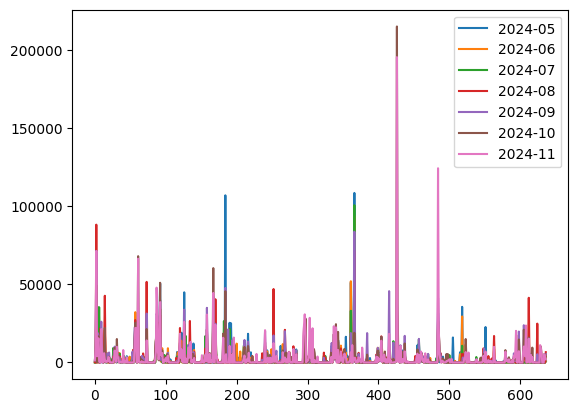

In [79]:
# plot this data to see trends and seasonality
df.plot()
plt.show()

# plot this data to see trends and seasonality


In [80]:
# Melt the DataFrame to long format
df_melted = df.melt(var_name='Month', value_name='Donation')

# Convert 'Month' to datetime format
df_melted['Month'] = pd.to_datetime(df_melted['Month'])
# show the first few rows of the dataframe



In [81]:
df_melted.head()

,Month,Donation
0,2024-01-01,0
1,2024-01-01,2000
2,2024-01-01,6946
3,2024-01-01,32082
4,2024-01-01,0


In [82]:
print(df_melted.dtypes)

Month       datetime64[ns]
Donation            object
dtype: object


In [83]:
df_melted['Donation'] = pd.to_numeric(df_melted['Donation'], errors='coerce')

In [84]:
df_melted.dropna(subset=['Donation'], inplace=True)

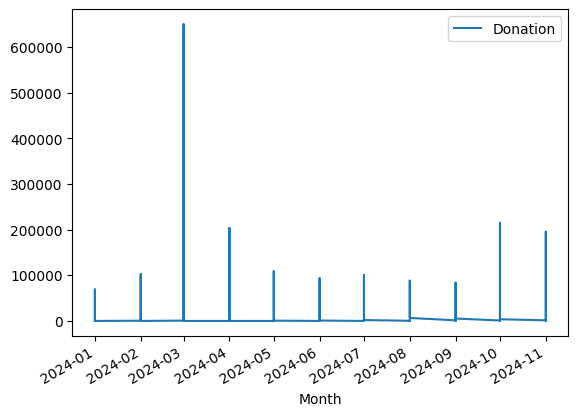

In [85]:
# plot this data to see trends and seasonality
df_melted.plot(x='Month', y='Donation')
plt.show()





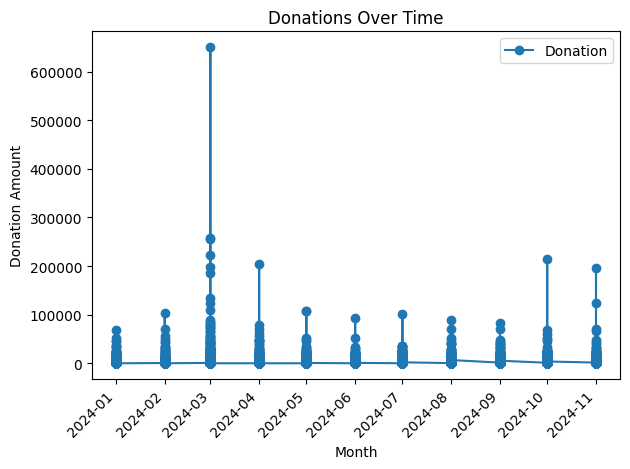

In [86]:
import matplotlib.pyplot as plt

# Plot the data
df_melted.plot(x='Month', y='Donation', kind='line', marker='o')
plt.title('Donations Over Time')
plt.xlabel('Month')
plt.ylabel('Donation Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 1. Box Plot for Distribution of Donations

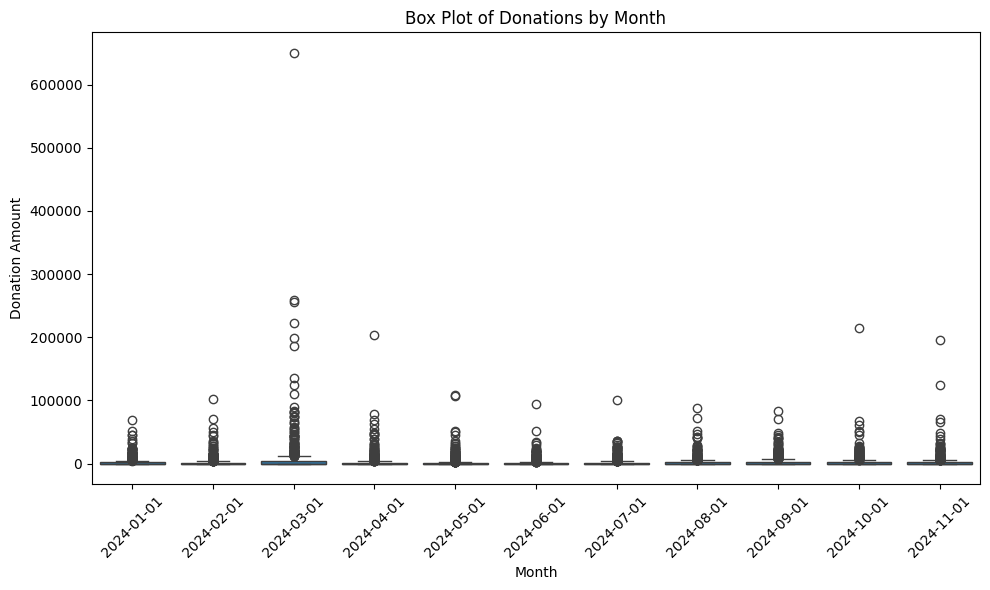

In [87]:
# importing sns
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x='Month', y='Donation')
plt.title('Box Plot of Donations by Month')
plt.xlabel('Month')
plt.ylabel('Donation Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. Area Plot for Total Donations Over Time

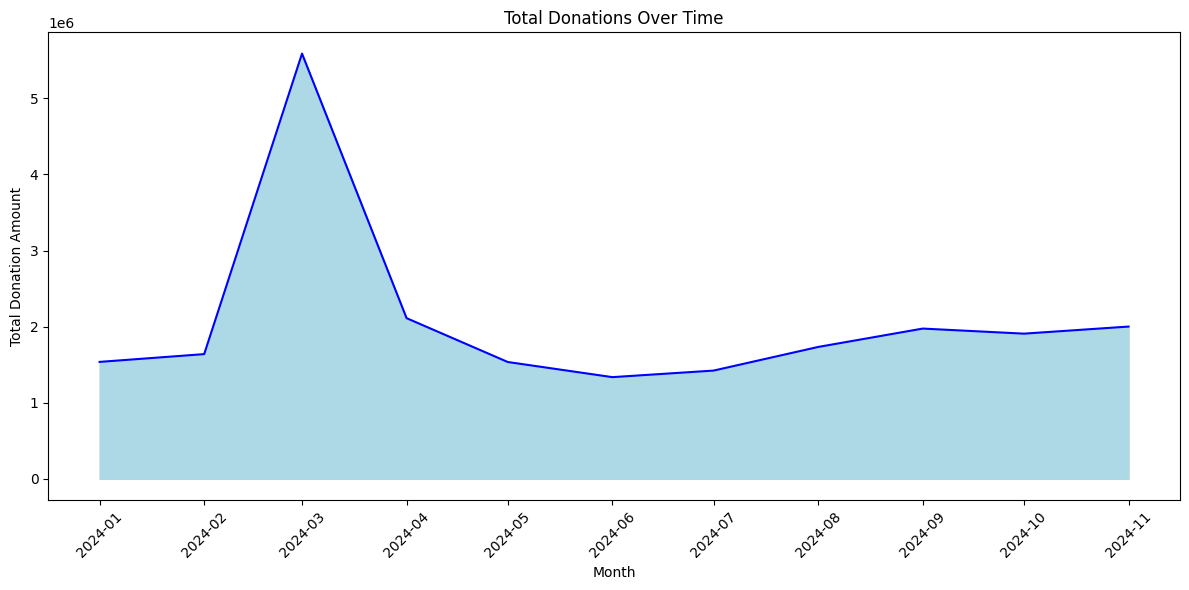

In [88]:
# Group by month and sum donations
monthly_totals = df_melted.groupby('Month')['Donation'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.fill_between(monthly_totals['Month'], monthly_totals['Donation'], color='lightblue')
plt.plot(monthly_totals['Month'], monthly_totals['Donation'], color='blue')
plt.title('Total Donations Over Time')
plt.xlabel('Month')
plt.ylabel('Total Donation Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

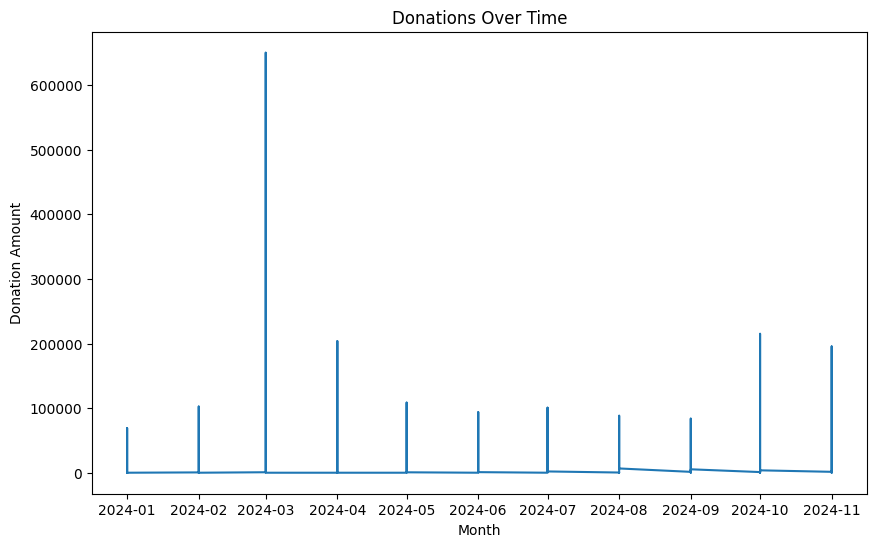

In [89]:
# plot this data to see trends and seasonality
plt.figure(figsize=(10, 6))
plt.plot(df_melted['Month'], df_melted['Donation'])
plt.xlabel('Month')
plt.ylabel('Donation Amount')
plt.title('Donations Over Time')
plt.show()

In [90]:
df.columns

Index(['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
       '2024-07', '2024-08', '2024-09', '2024-10', '2024-11'],
      dtype='object')

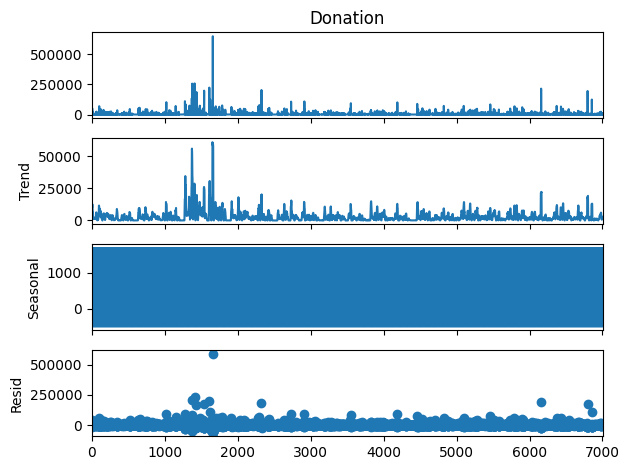

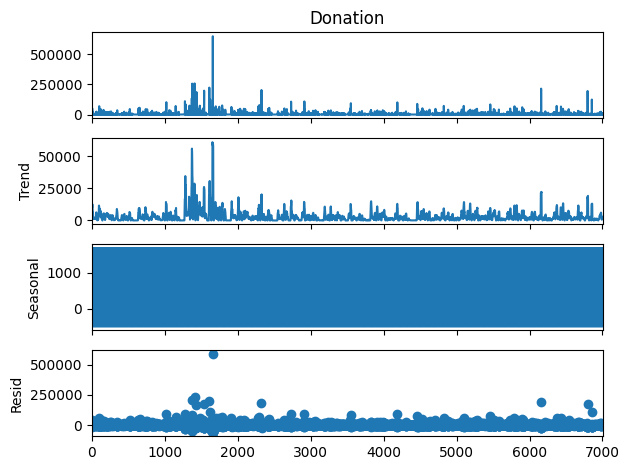

In [91]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_melted['Donation'], model='additive', period=12)

decomposition.plot()


## linear regression model

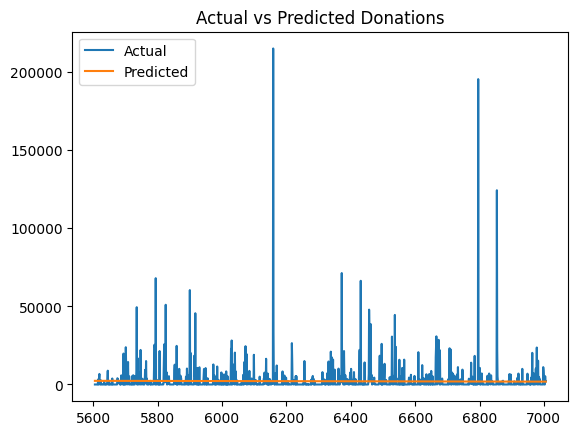

In [92]:
# import linear regression
from sklearn.linear_model import LinearRegression
# Split the data into train and test
train_size = int(len(df_melted) * 0.8)
train = df_melted[:train_size]
test = df_melted[train_size:]

# Fit the linear regression model on the training set
model = LinearRegression()
model.fit(train.index.values.reshape(-1, 1), train['Donation'])

# Make predictions on the testing set
predictions = model.predict(test.index.values.reshape(-1, 1))

# Plot the actual and predicted values
plt.plot(test.index, test['Donation'], label='Actual')
plt.plot(test.index, predictions, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Donations')

plt.show()

## XGBoost

##

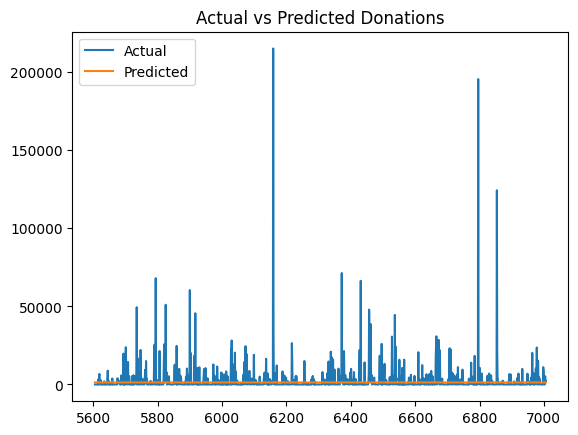

In [94]:
from xgboost import XGBRegressor
# Split the data into train and test
train_size = int(len(df_melted) * 0.8)
train = df_melted[:train_size]
test = df_melted[train_size:]

# Fit the linear regression model on the training set
model = XGBRegressor()
model.fit(train.index.values.reshape(-1, 1), train['Donation'])

# Make predictions on the testing set
predictions = model.predict(test.index.values.reshape(-1, 1))

# Plot the actual and predicted values
plt.plot(test.index, test['Donation'], label='Actual')
plt.plot(test.index, predictions, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Donations')

plt.show()


## Random Forest Model

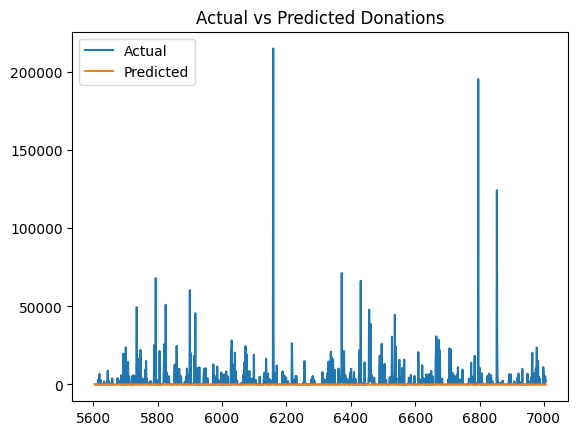

In [95]:
from sklearn.ensemble import RandomForestRegressor

# Split the data into train and test
train_size = int(len(df_melted) * 0.8)
train = df_melted[:train_size]
test = df_melted[train_size:]

# Fit the linear regression model on the training set
model = RandomForestRegressor()
model.fit(train.index.values.reshape(-1, 1), train['Donation'])

# Make predictions on the testing set
predictions = model.predict(test.index.values.reshape(-1, 1))

# Plot the actual and predicted values
plt.plot(test.index, test['Donation'], label='Actual')
plt.plot(test.index, predictions, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Donations')

plt.show()

# Neural Network

Epoch 1/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 467183072.0000
Epoch 2/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 291605408.0000
Epoch 3/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 220175584.0000
Epoch 4/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 186108240.0000
Epoch 5/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 321495744.0000
Epoch 6/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 170851248.0000
Epoch 7/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 212689760.0000
Epoch 8/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 159723072.0000
Epoch 9/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 518524480.0000
Epoch 10/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 115987320.0000
Epoch 11/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 224377552.0000
Epoch 12/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 180253904.0000
Epoch 13/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 117437040.0000
Epoch 14/50
560/560 ━

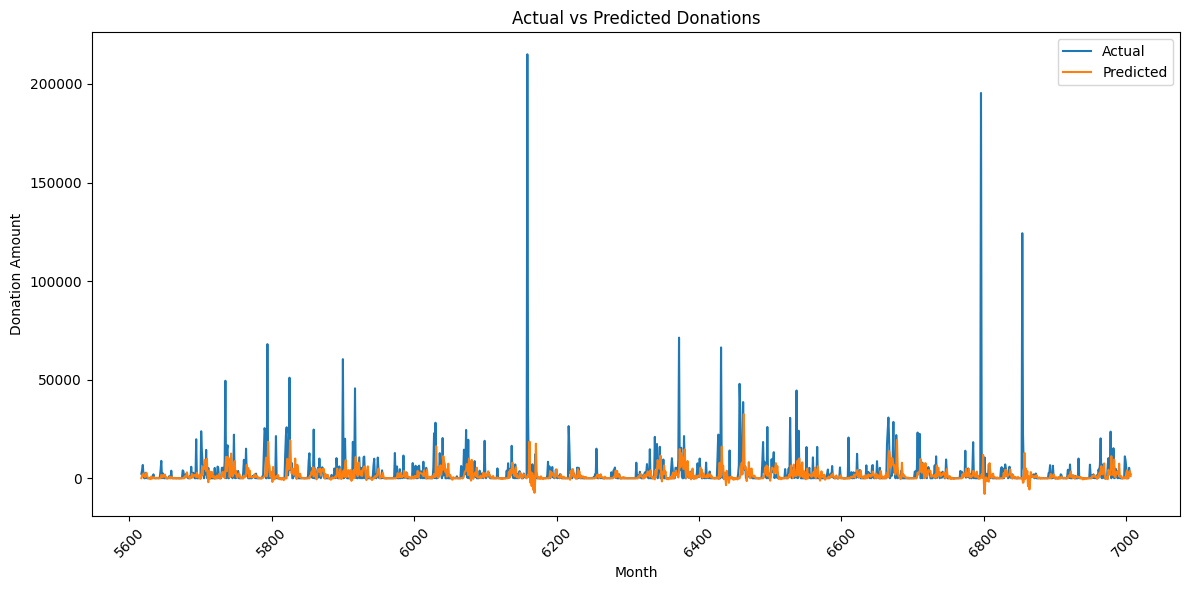

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# Split the data into train and test
train_size = int(len(df_melted) * 0.8)
train = df_melted[:train_size]
test = df_melted[train_size:]

# Define the number of lagged time steps to use as input features
lags = 12

# Create the input and output data for the neural network
X_train = np.array([train["Donation"].values[i:i + lags] for i in range(len(train) - lags)])
y_train = np.array([train["Donation"].values[i + lags] for i in range(len(train) - lags)])

X_test = np.array([test["Donation"].values[i:i + lags] for i in range(len(test) - lags)])
y_test = np.array([test["Donation"].values[i + lags] for i in range(len(test) - lags)])

# Create the neural network model
model = Sequential()
model.add(Dense(10, input_dim=lags, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the neural network model
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index[lags:], test['Donation'].values[lags:], label='Actual')  # Shift by lags
plt.plot(test.index[lags:], predictions, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Donations')
plt.xlabel('Month')
plt.ylabel('Donation Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

